In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import plotly.express as ex

In [2]:
df=pd.read_csv('/home/faris/StackOverFlow/calendar.csv')

In [3]:
rows=df.shape[0]
columns=df.shape[1]
df

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN


In [4]:
df['price']=df['price'].str.replace('$','').str.replace(",","")
df['price']=df['price'].astype(float)

/tmp/ipykernel_1097939/76871987.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price']=df['price'].str.replace('$','').str.replace(",","")


In [5]:
df['price']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1308885   NaN
1308886   NaN
1308887   NaN
1308888   NaN
1308889   NaN
Name: price, Length: 1308890, dtype: float64

In [6]:
df2=pd.get_dummies(data=df,columns=['date','available'])

In [7]:
testdata=df[df['price'].isnull()]
testdata2=df2[df2['price'].isnull()]

In [8]:
df.dropna(inplace=True)
df2.dropna(inplace=True)
x_train=df2.drop('price',axis=1)
y_train=df2['price']

In [9]:
model=LinearRegression()

In [10]:
model.fit(x_train,y_train)

LinearRegression()

In [11]:
x_test=testdata2.drop('price',axis=1)

In [12]:
y_pred=model.predict(x_test)
y_pred.shape

(665853,)

In [13]:
testdata['price']=y_pred

/tmp/ipykernel_1097939/18832366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdata['price']=y_pred


In [15]:
df=df.append(testdata)

/tmp/ipykernel_1097939/229681267.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(testdata)


In [17]:
df[['year', 'month','day']] = df.date.str.split("-", expand = True)
df

,listing_id,date,available,price,year,month,day
365,3075044,2017-08-22,t,65.000000,2017,08,22
366,3075044,2017-08-21,t,65.000000,2017,08,21
367,3075044,2017-08-20,t,65.000000,2017,08,20
368,3075044,2017-08-19,t,75.000000,2017,08,19
369,3075044,2017-08-18,t,75.000000,2017,08,18
...,...,...,...,...,...,...,...
1308885,14504422,2016-09-10,f,259.231692,2016,09,10
1308886,14504422,2016-09-09,f,254.396457,2016,09,09
1308887,14504422,2016-09-08,f,244.227741,2016,09,08
1308888,14504422,2016-09-07,f,244.064262,2016,09,07


(array([222332., 107580., 111166., 107580., 111166., 100408., 107580.,
        111166., 111166., 218746.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

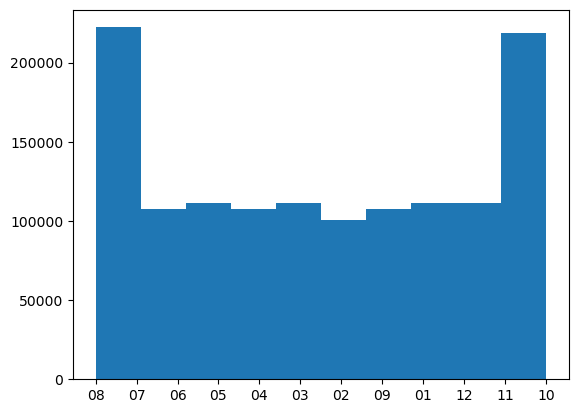

In [19]:
plt.hist(df['month'])